### Xarray is an open source project and Python package that introduces labels in the form of dimensions, coordinates, and attributes on top of raw NumPy-like arrays, which. allows for more intuitive, more concise, and less errorr-prone user experience.

### Key Features of xarray
#### 1. Labeld dimensions and coordinatees
##### Unlike NumPy arrays, xarray associates labes with dimensions which helps avoid errors from incorrect indexing.
#### 2. Two core data structures
##### DataArray: A single multi-dimensional arrray with labeled axes.
##### Dataset: A collection of multiple DataArray objects, similar to a dictionary of DataArrays.
#### 3. Easy indexing and slicing
##### Instead of using numerical indices, xarray allows indexing by coordinate values.
#### 4. Built-in support for NetCDF
##### It can read and write NetCDF files, making it a aperferred tool in atms.
#### 5. Groupby, resampling, and aggregation
##### You can group data by time, apply reductions (mean, sum, ect.), and resample (ex. daily to monthly).

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns

In [2]:
#Here is an example of how to manipulate weather data using xarray
np.random.seed(123)

xr.set_options(display_style="html")

times = pd.date_range("2000-01-01", "2001-12-31", name="time")
annual_cycle = np.sin(2 * np.pi * (times.dayofyear.values / 365.25 - 0.28))

base = 10 + 15 * annual_cycle.reshape(-1, 1)
tmin_values = base + 3 * np.random.randn(annual_cycle.size, 3)
tmax_values = base + 10 + 3 * np.random.randn(annual_cycle.size, 3)

ds = xr.Dataset(
    {
        "tmin": (("time", "location"), tmin_values),
        "tmax": (("time", "location"), tmax_values),
    },
    {"time": times, "location": ["IA", "IN", "IL"]},
)

ds


<xarray.Dataset>
Dimensions:   (time: 731, location: 3)
Coordinates:
  * time      (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2001-12-31
  * location  (location) <U2 'IA' 'IN' 'IL'
Data variables:
    tmin      (time, location) float64 -8.037 -1.788 -3.932 ... -1.346 -4.544
    tmax      (time, location) float64 12.98 3.31 6.779 ... 6.636 3.343 3.805

<AxesSubplot:xlabel='time'>

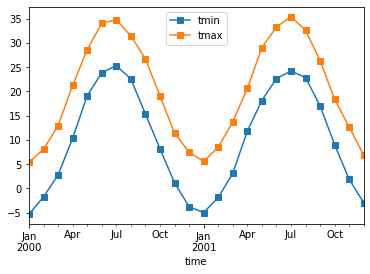

In [3]:
#Xarray is often used with pandas for tabular data
monthly_avg = ds.resample(time="1MS").mean()
monthly_avg.sel(location="IA").to_dataframe().plot(style="s-")

In [4]:
#Labeled dimensions and coordinates 

#Created an aarraay with dimentions
data = xr.DataArray(np.random.rand(3, 4), 
                    dims=["time", "location"], 
                    coords={"time": ["2024-01-01", "2024-01-02", "2024-01-03"], 
                            "location": ["A", "B", "C", "D"]})

print(data)

<xarray.DataArray (time: 3, location: 4)>
array([[0.74698752, 0.56350318, 0.47227596, 0.88989519],
       [0.07805203, 0.38896157, 0.14319548, 0.00242971],
       [0.37020108, 0.5031259 , 0.05895404, 0.41562317]])
Coordinates:
  * time      (time) <U10 '2024-01-01' '2024-01-02' '2024-01-03'
  * location  (location) <U1 'A' 'B' 'C' 'D'


In [6]:
# Two core data structres
temp = xr.DataArray([15, 18, 20], dims="day", coords={"day": [1, 2, 3]})
print(temp)

# Example of dataset
ds = xr.Dataset(
    {"temp": ("day", [15, 18, 20]),
     "humidity": ("day", [50, 60, 65])},
    coords={"day": [1, 2, 3]}
)
print(ds)

<xarray.DataArray (day: 3)>
array([15, 18, 20])
Coordinates:
  * day      (day) int64 1 2 3
<xarray.Dataset>
Dimensions:   (day: 3)
Coordinates:
  * day       (day) int64 1 2 3
Data variables:
    temp      (day) int64 15 18 20
    humidity  (day) int64 50 60 65


In [8]:
# Bilt-in support of NetCDF
# Save dataset to NetCDF
ds.to_netcdf("weather_data.nc")

# Load NetCDF file
ds_loaded = xr.open_dataset("weather_data.nc")
print(ds_loaded)


<xarray.Dataset>
Dimensions:   (day: 3)
Coordinates:
  * day       (day) int32 1 2 3
Data variables:
    temp      (day) int32 ...
    humidity  (day) int32 ...


In [9]:
# Groupby, resampling, and aggregation
times = pd.date_range("2024-01-01", periods=6, freq="D")
data = xr.DataArray([10, 14, 20, 22, 39, 46], dims="time", coords={"time": times})

# Resample data from daily to monthly mean
monthly_mean = data.resample(time="M").mean()
print(monthly_mean)


<xarray.DataArray (time: 1)>
array([25.16666667])
Coordinates:
  * time     (time) datetime64[ns] 2024-01-31
